In [1]:
#ds.to_netcdf("convectProfiles.nc",encoding={'zku':{'zlib':True,'complevel':5},'zka':{'zlib':True,'complevel':5},'precipRate':{'zlib':True,'complevel':5},'bzd':{'zlib':True,'complevel':5},'bcf':{'zlib':True,'complevel':5},'pType':{'zlib':True,'complevel':5},'bsfc':{'zlib':True,'complevel':5},'piah':{'zlib':True,'complevel':5}})

# read data from convectProfiles.nc using netCDF4
import netCDF4 as nc
with nc.Dataset('convectProfiles.nc') as ds:
    zku = ds['zku'][:]
    zka = ds['zka'][:]
    precipRate = ds['precipRate'][:]
    bzd = ds['bzd'][:]
    bcf = ds['bcf'][:]
    pType = ds['pType'][:]
    bsfc = ds['bsfc'][:]
    piah = ds['piah'][:]
    zCorrected=ds['zCorrected'][:]
    binNodes=ds['binNodes'][:]
    dm=ds['dm'][:]
    qv=ds['qv'][:]
    press=ds['press'][:]
    airTemp=ds['airTemp'][:]
    envNodes=ds['envNodes'][:]

In [2]:
import libScatter as libSc
import numpy as np
freqs=[10,19,22,35,89,166,183,190]
#print(envNodes[0,3,3,:])
#print(qv[0,3,3,:])
#print(press[0,3,3,:])
print(airTemp[0,3,3,:])
rho=press*100/(287.058*(airTemp))
qv[qv<1e-3]=1e-3
#print(rho[0,3,3,:])
rhowv=qv*rho*1e-3

rhowvint=np.interp(np.arange(88),envNodes[0,3,3,:],rhowv[0,3,3,:])
pressint=np.interp(np.arange(88),envNodes[0,3,3,:],press[0,3,3,:])
airTempint=np.interp(np.arange(88),envNodes[0,3,3,:],airTemp[0,3,3,:])
kextKaL=[]
freqKa=35.5
for i in range(88):
    ireturn=1
    kextKa=libSc.gasabsr98(freqKa,airTempint[i],rhowvint[i],pressint[i],ireturn)
    kextKaL.append(kextKa[0]+kextKa[1])
print(kextKaL)
kextKaL=np.array(kextKaL)

[204.76425 208.70834 234.4599  248.98721 262.1417  274.1039  284.35852
 289.30005 292.70816 294.74435]
[1.3615328198213206e-08, 1.3615328198213206e-08, 1.3615328198213206e-08, 1.3615328198213206e-08, 1.3615328198213206e-08, 1.3615328198213206e-08, 1.3615328198213206e-08, 1.3615328198213206e-08, 1.3615328198213206e-08, 1.3615328198213206e-08, 1.3615328198213206e-08, 1.3615328198213206e-08, 1.3615328198213206e-08, 1.3615328198213206e-08, 1.3615328198213206e-08, 1.3615328198213206e-08, 1.5132355701830136e-08, 1.6723842366506148e-08, 1.838901453332653e-08, 2.012707706056105e-08, 2.193722775656326e-08, 2.3818716166079668e-08, 2.5770754419340847e-08, 2.779259561380698e-08, 2.9883484298220964e-08, 3.204265597300804e-08, 3.426942274398215e-08, 3.656300240351129e-08, 3.892267308458486e-08, 4.134774589381607e-08, 4.383748464231729e-08, 4.639121431448956e-08, 5.260023039355133e-08, 5.915421619206995e-08, 6.602463997751329e-08, 7.318510331089101e-08, 8.061116396618218e-08, 8.828031639041001e-08, 9

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from simCMB import simulateZKa
import simCMB
#reload (simulateZKa)
import importlib
importlib.reload(simCMB)

a=np.nonzero(precipRate[:,3,3,-1]>10)
print(zku.shape)
print(len(a[0]))
#print(precipRate[a[0],3,3,-1])
for i in range(-1,-2):
    for j in range(-1,2):
        plt.plot(zku[a[0][0],3+i,3+j,:],range(176),'*')
dm_factor=0.998
import lkTables
import lkTables as lkT
lkTables_=lkT.scattTables()
#print(lkTables_.dms[0:253])
zka12_nomL=[]
import tqdm
for i0 in tqdm.tqdm(range(len(a[0]))):
    zKaSim,zkaSfc,kexttot,salbtot,asym1D,zKa_true,zms=simCMB.simulateZKa(binNodes[a[0][i0],:,:],zCorrected[a[0][i0],:,:],dm[a[0][i0],:,:],dm_factor,lkTables_,pType[a[0][i0],:,:],kextKaL,libSc)
    zka12_nomL.append([zKaSim[3,3,binNodes[a[0][i0],3,3,1]],zka[a[0][i0],3,3,binNodes[a[0][i0],3,3,1]*2],\
                   zms[3,3,binNodes[a[0][i0],3,3,1]]])
    #break


(33739, 7, 7, 176)
2729


100%|██████████| 2729/2729 [04:06<00:00, 11.08it/s]


In [6]:
#print(lkTables_.asymR[0:253,3])
n1=binNodes[a[0][i0],3,3,1]
print(zKaSim[3,3,n1-10:n1])
print(zms[3,3,n1-10:n1])
print(zkaSfc[3,3]-zka[a[0][i0],3,3,n1])


[20.70061623 21.29144205 22.44904649 22.42621111 23.97026601 25.93309432
 26.6529506  27.96780739 27.59064979 28.56193791]
[20.76476669 21.35083771 22.50295639 22.49047279 24.02855873 25.99346542
 26.73828506 28.07870483 27.76576614 28.76931763]
7.189746396168253


In [20]:
noms=0
alt=400
theta=0.5
nonorm=1
dr=0.25
n1=binNodes[a[0][0],3,3,-1]
print(n1)
print(kexttot[3,3,:n1].shape,salbtot[3,3,:n1].shape,asym1D[3,3,:n1,3].shape,\
                        zKa_true[3,3,:n1].shape)
print(kexttot[3,3,n1-10:n1])
print(salbtot[3,3,n1-10:n1])
print(asym1D[3,3,n1-10:n1,3])
zms = libSc.multiscatterf(kexttot[3,3,:n1],salbtot[3,3,:n1],asym1D[3,3,:n1,3],\
                        zKa_true[3,3,:n1],dr,noms,alt,theta,freqKa,nonorm)
#print(zms)
#print(zKaSim[3,3,:binNodes[a[0][0],3,3,-1]])

83
(83,) (83,) (83,) (83,)
[0.46204982 0.51019339 0.6585391  0.63870592 0.65916437 0.74983024
 0.79076153 0.84597012 0.89476271 0.98229987]
[0.18608459 0.20960098 0.28232885 0.27606573 0.28598559 0.334977
 0.35594245 0.3876661  0.41548548 0.46530352]
[1.58991408 1.82151103 2.46025991 2.6277554  2.71541381 3.40946484
 3.63619065 4.26735115 4.84587526 5.85604858]


In [ ]:
#plt.plot(zka[a[0][0],3,3,:],range(176))
#plt.xlim(0,50)
#plt.ylim(175,100)
plt.figure()
plt.subplot(121)
plt.pcolormesh(zku[a[0][i0],:,3,:].T,vmin=0,vmax=50,cmap='jet')
plt.ylim(175,100)
plt.subplot(122)
plt.pcolormesh(zka[a[0][i0],:,3,:].T,vmin=0,vmax=50,cmap='jet')
plt.plot(np.arange(7)+0.5,bzd[a[0][i0],3,:])
plt.plot(np.arange(7)+0.5,bcf[a[0][i0],3,:])
plt.ylim(175,100)

plt.figure()
plt.subplot(121)
plt.subplot(122)
plt.pcolormesh(zKaSim[:,3,:].T,vmin=0,vmax=50,cmap='jet')
plt.ylim(87,50)

[[1.         0.71776945]
 [0.71776945 1.        ]]
[[1.        0.8640831]
 [0.8640831 1.       ]]


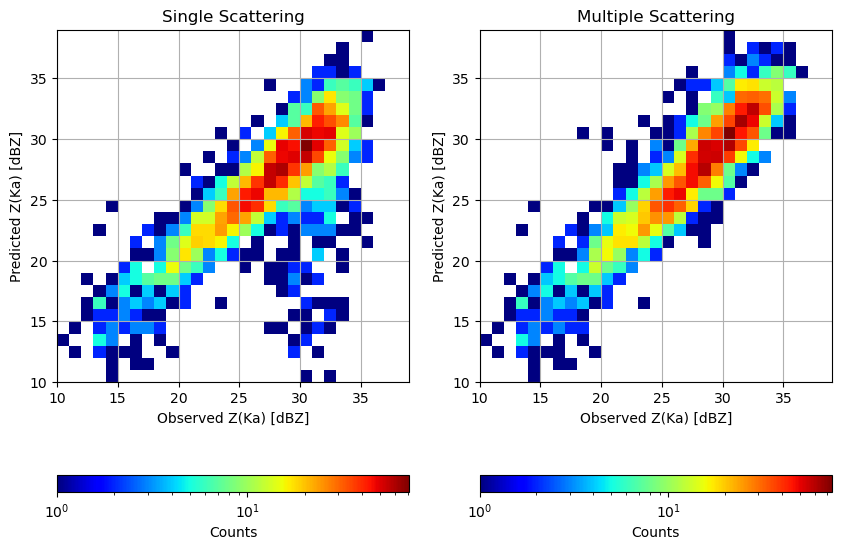

In [15]:
zka12_nomL=np.array(zka12_nomL)
#zka12L_nom=np.array(zka12L_nom)
import matplotlib.colors as colors 
from matplotlib.colors import LogNorm
plt.figure(figsize=(10,8))
ax=plt.subplot(121)
zka12_nomL[zka12_nomL<-10]=-10
h2=plt.hist2d(zka12_nomL[:,1],zka12_nomL[:,0],bins=np.arange(30)+10,norm=LogNorm(),cmap='jet')
#zka12L[zka12L<-10]=-10
#
plt.grid()
#zka12L.min(axis=0)
ax.set_aspect('equal')
plt.xlabel('Observed Z(Ka) [dBZ]')
plt.ylabel('Predicted Z(Ka) [dBZ]')
plt.title('Single Scattering')
plt.colorbar(h2[3],orientation='horizontal',label='Counts')
ax=plt.subplot(122)
h2=plt.hist2d(zka12_nomL[:,1],zka12_nomL[:,2],bins=np.arange(30)+10,norm=LogNorm(),cmap='jet')
#zka12L[zka12L<-10]=-10
#zka12L.min(axis=0)
ax.set_aspect('equal')
print(np.corrcoef(zka12_nomL[:,0],zka12_nomL[:,1]))
print(np.corrcoef(zka12_nomL[:,2],zka12_nomL[:,1]))
plt.xlabel('Observed Z(Ka) [dBZ]')
plt.ylabel('Predicted Z(Ka) [dBZ]')
plt.title('Multiple Scattering')

plt.grid()
plt.colorbar(h2[3],orientation='horizontal',label='Counts')
plt.savefig('simulatedZKaConvection_nominal_2.png',dpi=300)

In [35]:
from bisectm import bisectm
ind=bisectm(lkTables_.dms.data,253,0.79)

In [4]:
graupAttCoeffs=np.array([0.99309693, 10.0**(-5.28837939)])
rainAttCoeffs=np.array([0.69680178, 10.0**(-3.14072835)])

def get_alpha_bet(graupAttCoeffs,rainAttCoeffs,nodes):
    alpha=np.zeros(176)
    beta=np.zeros(176)
    alpha=np.interp(np.arange(176),[0,nodes[0],nodes[1],175],[graupAttCoeffs[1],graupAttCoeffs[1],\
                                                             rainAttCoeffs[1],rainAttCoeffs[1]])
    beta=np.interp(np.arange(176),[0,nodes[0],nodes[1],175],[graupAttCoeffs[0],graupAttCoeffs[0],\
                                                                rainAttCoeffs[0],rainAttCoeffs[0]])
    return alpha,beta
def hbConv(zKum,dn,alpha,beta,dr):
    q=0.2*np.log(10)
    zeta=q*beta*dn**(1-beta)*alpha*10**(0.1*zKum*beta)*dr
    zetaSum=zeta.cumsum()[-1]
    if zetaSum>0.995:
        f=0.995/zetaSum
    else:
        f=1
    zc=zKum-10/beta*np.log10(1-f*zeta.cumsum())
    pia=-10/beta*np.log10(1-f*zeta.cumsum()[-1])
    return zc,pia

def hbConvWithPIA(zKum,alpha,beta,pia,dr):
    dn=1.0
    q=0.2*np.log(10)
    zeta=q*beta*dn**(1-beta)*alpha*10**(0.1*zKum*beta)*dr
    zetaSum=zeta.cumsum()[-1]
    
    f=(1-10**(-0.1*beta[-1]*pia))/zetaSum
    zc=zKum-10/beta*np.log10(1-f*zeta.cumsum())
    pia_out=-10/beta[-1]*np.log10(1-f*zeta.cumsum()[-1])
    return zc,pia_out,f

In [5]:
#
import numpy as np
import time
from datetime import date
import matplotlib.pyplot as plt
import sys
sys.path.insert(0,"/Users/mgrecu/GPM/ORO_old/retr")
import lkTables
from radarRetrSubs import *

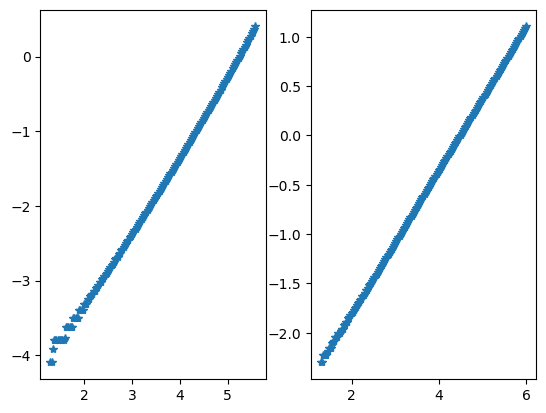

In [7]:
#print(dir(lkTables))
#print(dir(lkTables.scattTables))
#a=np.nonzero(lkTables.scattTables.attKuG[:]>0)
#attKuGCoeffs=np.polyfit(lkTables.scattTables.zKuG[a]/10,np.log10(lkTables.scattTables.attKuG[a]),1)

#print(attKuGCoeffs)
#print(np.log10(lkTables.scattTables.attKuG[50:]))
#print(lkTables.scattTables.zKuG[50:]/10)

plt.subplot(121)    
plt.plot(lkTables.scattTables.zKuG[100:]/10,np.log10(lkTables.scattTables.attKuG[100:]),'*')
#plt.plot(lkTables.scattTables.zKuG[100:]/10,np.polyval(attKuGCoeffs,lkTables.scattTables.zKuG[100:]/10))

#a=np.nonzero(lkTables.scattTables.attKuR[:]>0)
#attKuRCoeffs=np.polyfit(lkTables.scattTables.zKuR[a]/10,np.log10(lkTables.scattTables.attKuR[a]),1)
#print(attKuRCoeffs)

plt.subplot(122)
plt.plot(lkTables.scattTables.zKuR[100:]/10,np.log10(lkTables.scattTables.attKuR[100:]),'*')
#plt.plot(lkTables.scattTables.zKuR[100:]/10,np.polyval(attKuRCoeffs,lkTables.scattTables.zKuR[100:]/10))




In [17]:
i0=95
def get_alpha_bet(graupCoeffs,rainCoeffs,nodes):
    alpha=np.zeros(176)
    beta=np.zeros(176)
    alpha=np.interp(np.arange(176),[0,nodes[0],nodes[1],175],[graupCoeffs[1],graupCoeffs[1],\
                                                             rainCoeffs[1],rainCoeffs[1]])
    beta=np.interp(np.arange(176),[0,nodes[0],nodes[1],175],[graupCoeffs[0],graupCoeffs[0],\
                                                                rainCoeffs[0],rainCoeffs[0]])
    return alpha,beta

rateL=[]
def profiling(zku,zka,a,i0,bzd,bcf):
    zm=zku[a[0][i0],3,3,:]
    zm_ka=zka[a[0][i0],3,3,:]
    zm_ka[zm_ka<0]=0
    zm[zm<0]=0
    #plt.plot(zm,range(176),'*')
    #plt.plot(zm_ka,range(176),'*')
    #plt.ylim(175,80)
    nodes=[bzd[a[0][0],3,3],bzd[a[0][0],3,3]+4]
    #print(nodes)

    alpha,beta=get_alpha_bet(graupAttCoeffs,rainAttCoeffs,nodes)    
    bcf1=bcf[a[0][i0],3,3]
    piaKuH=piah[a[0][i0],3,3,0]
    dr=0.125
    zc,pia_out,f=hbConvWithPIA(zm[:bcf1],alpha[:bcf1],beta[:bcf1],piaKuH,dr)

    #plt.plot(zc,range(bcf1),'-')
    #print(pia_out,piaKuH,f)
    dn=np.log10(f)/(1-rainAttCoeffs[1])
    #print(dn,piaKuH)
    dnw=np.zeros(176)+dn
    zkaRet,zka_true,piaKaG,pRateG,kextKaG,salbKaG,asymKaG,dmG,piaKuG=getZKa_graup(dnw[:nodes[1]]+0.25,zc[:nodes[1]],lkTables.scattTables,dr)
    dbin=0
    zkaRetRain,zka_true,piaKaR,pRateR,kextKaR,\
    asymKaR,salbKaR,dmR,piaKuR=getZKa_rain(dnw[nodes[1]:bcf1]-0.5,zc[nodes[1]:bcf1],lkTables.scattTables,dr,\
                                           piaKaG,piaKuG,dbin)
    return pRateR[-1],piaKuR
piaKuL=[]
for i in range(0,len(a[0])):
    pRateSfc,piaKu=profiling(zku,zka,a,i,bzd,bcf)
    rateL.append(pRateSfc)
    piaKuL.append(piaKu)
    #print(i,rateL[-1])
#plt.plot(zkaRet,range(nodes[1]),'-')
#plt.plot(zkaRetRain,range(nodes[1],bcf1),'-')
#plt.xlim(0,50)
#print(piaKaG,piaKaR)

[[1.         0.12867209]
 [0.12867209 1.        ]]
11.132817986845643 106.94715
3.054962656778621 4.229884


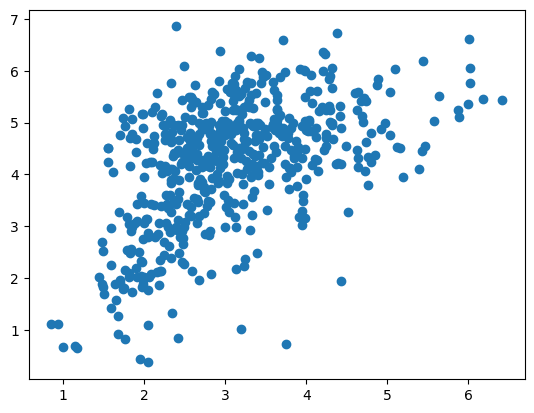

In [21]:
print(np.corrcoef(rateL,precipRate[a[0],3,3,-1]))
print(np.mean(rateL),np.mean(precipRate[a[0],3,3,-1]))
plt.scatter(piaKuL,piah[a[0],3,3,0])
print(np.mean(piaKuL),np.mean(piah[a[0],3,3,0]))
#plt.scatter(rateL,precipRate[a[0],3,3,-1])